# SVM

## Main ideas of SVMs

- Find a linear decision surface (“hyperplane”) that can separate the different classes of samples and has the largest distance (i.e., largest “gap” or “margin”) between border-line samples (i.e., “support vectors”).

- If such linear decision surface does not exist, the data can mapped into a higher dimensional space (“feature space”) where the separating decision surface could be found.
- The higher dimensional feature space can be constructed via mathematical projection (“kernel trick”).

- Consider example dataset described by 2 features, denoted as X and Y.
- Represent samples as +1 or -1, geometrically (by “vectors”).

## Support vector machines for binary classification

In [29]:
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [30]:
class Data:
    def __init__(self, datagen, **kwargs):
        self.X, self.Y = datagen(**kwargs)
        if self.X.shape[-1]==2:
            self.x0 = self.X[:,0]
            self.x1 = self.X[:,1]

class Grid:
    def __init__(self, X, h=0.01):
        if X.shape[-1]==2:
            self.x0_min, self.x0_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
            self.x1_min, self.x1_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
            self.x0, self.x1 = np.meshgrid(
                np.arange(self.x0_min, self.x0_max, h),
                np.arange(self.x1_min, self.x1_max, h)
            )
            self.X = np.c_[self.x0.ravel(), self.x1.ravel()]
        elif X.shape[-1]==1:
            self.x_min, self.x_max = X[:].min() - 0.1, X[:].max() + 0.1
            self.X = np.arange(self.x_min, self.x_max, h).reshape([-1,1])

def plot_classification(model, data, hyperplane=False, **kwargs):
    
    model.fit(data.X, data.Y)
    
    grid = Grid(data.X)
    
    plt.figure(figsize=(8, 8))
    plt.clf()
    
    # get the separating hyperplane
    if hyperplane:
        w = model.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(grid.x0_min, grid.x0_max)
        yy = a * xx - (model.intercept_[0]) / w[1]

        # plot the parallels to the separating hyperplane that pass through the
        # support vectors (margin away from hyperplane in direction
        # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
        # 2-d.
        margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
        yy_down = yy - np.sqrt(1 + a ** 2) * margin
        yy_up = yy + np.sqrt(1 + a ** 2) * margin

        # plot the line, the points, and the nearest vectors to the plane
        plt.plot(xx, yy, 'k-')
        plt.plot(xx, yy_down, 'k--')
        plt.plot(xx, yy_up, 'k--')

    prediction = model.predict(grid.X)

    # Put the result into a color plot
    plt.pcolormesh(grid.x0, grid.x1, prediction.reshape(grid.x0.shape), cmap=plt.cm.Paired)

    plt.xlim(grid.x0_min, grid.x0_max)
    plt.ylim(grid.x1_min, grid.x1_max)

    plt.xticks(())
    plt.yticks(())
    if len(kwargs) != 0:
        plt.xlabel(kwargs)
    
    try:
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80,
                    facecolors='none', zorder=10, edgecolors='k')
    except:
        pass
    plt.scatter(data.x0, data.x1, c=data.Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')
    plt.show()

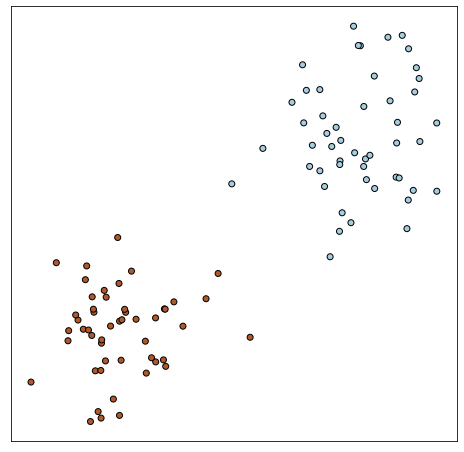

In [31]:
from sklearn.datasets import make_blobs

data0 = Data(make_blobs, centers=2, random_state=3)

plt.figure(figsize=(8, 8))
plt.scatter(data0.x0, data0.x1, c=data0.Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.show()

In [32]:
from sklearn.svm import SVC

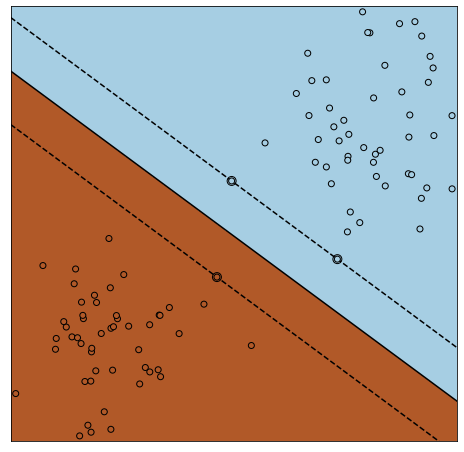

In [33]:
''' Hard margin '''

plot_classification(SVC(kernel='linear', C=1e12, max_iter=1e6), data0, hyperplane=True)

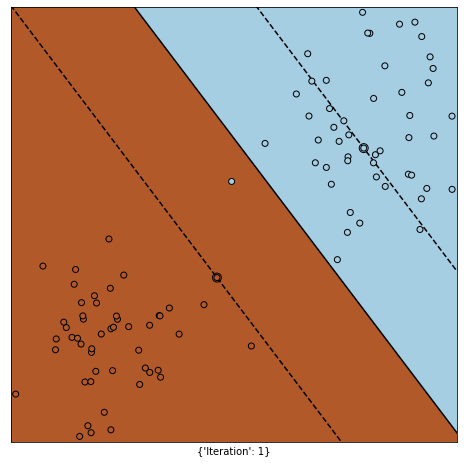

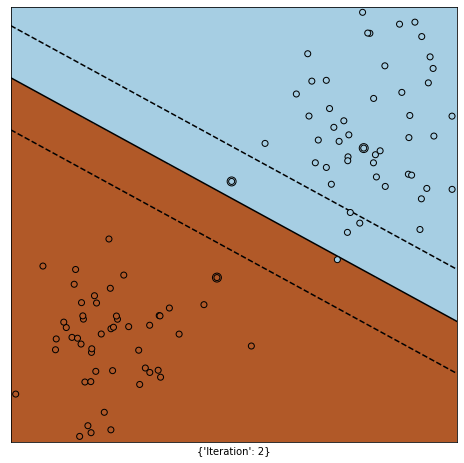

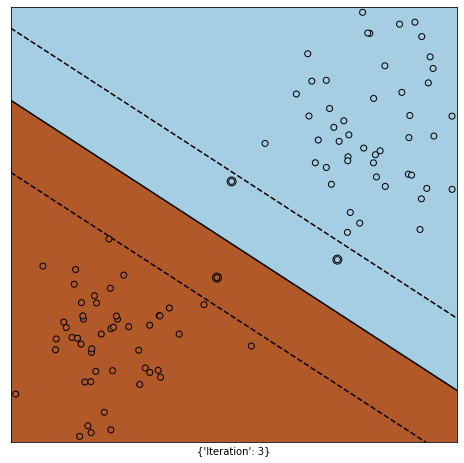

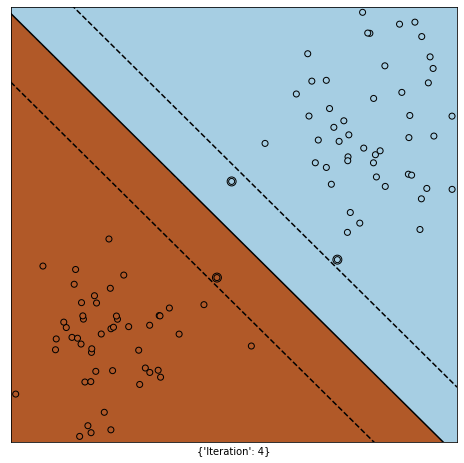

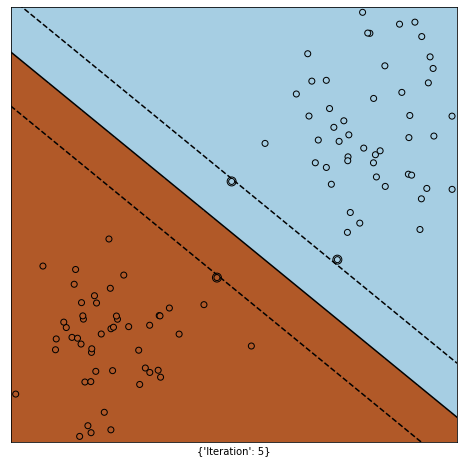

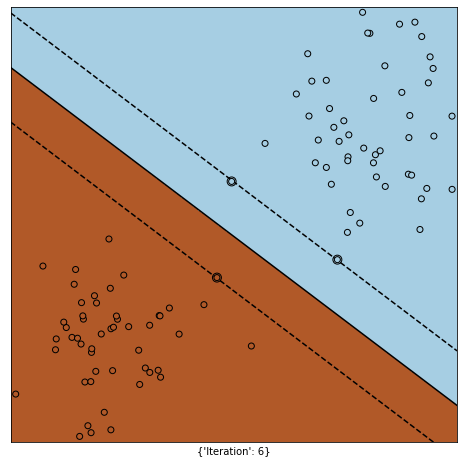

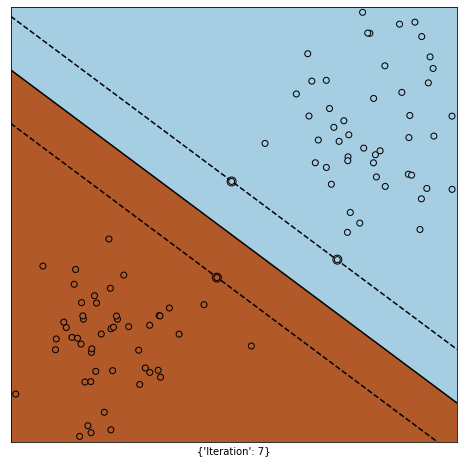

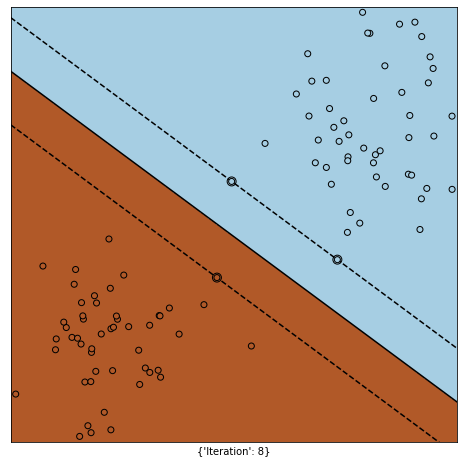

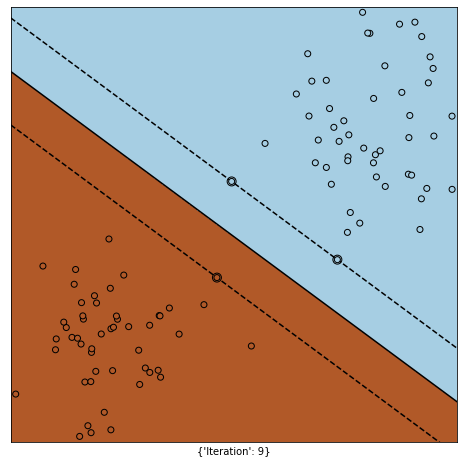

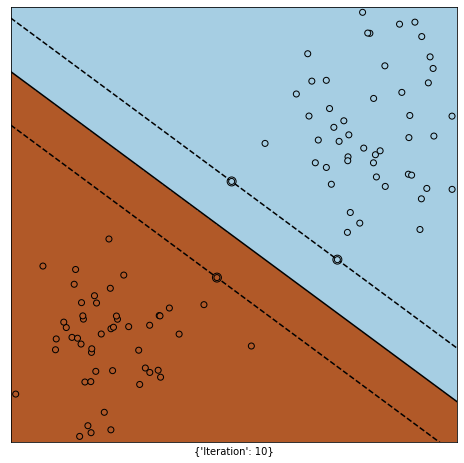

In [51]:
for idx in range(1,11):
    plot_classification(SVC(kernel='linear', C=1e12, max_iter=idx), data0, hyperplane=True, Iteration=idx)

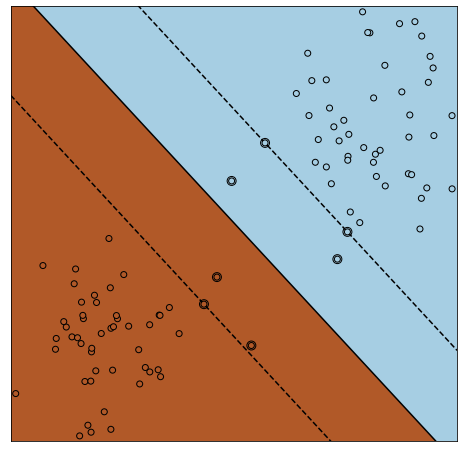

In [34]:
''' Soft margin '''

plot_classification(SVC(kernel='linear', C=0.1), data0, hyperplane=True)

## Not linearly separable data

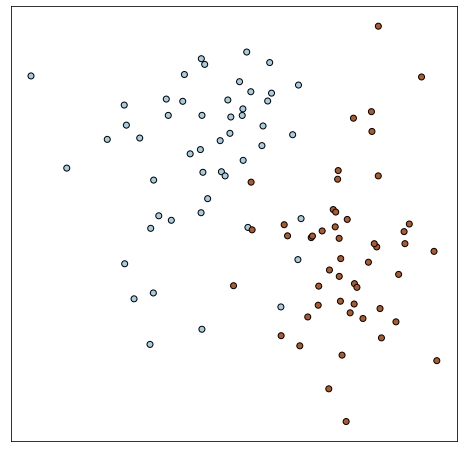

In [35]:
data1 = Data(make_blobs, centers=2, random_state=121)

plt.figure(figsize=(8, 8))
plt.scatter(data1.x0, data1.x1, c=data1.Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.show()

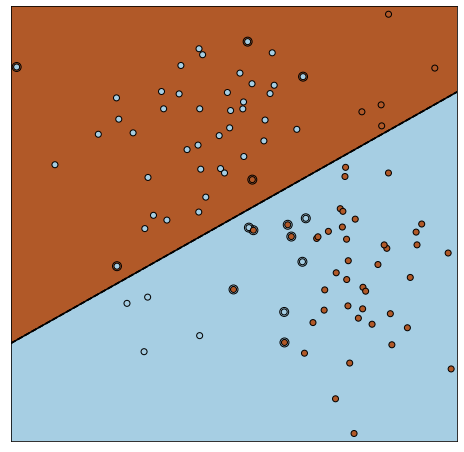

In [36]:
''' Hard margin '''

plot_classification(SVC(kernel='linear', C=1e12, max_iter=1e6), data1, hyperplane=True)

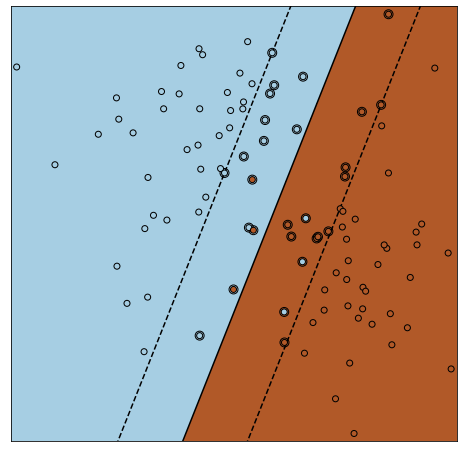

In [37]:
''' Soft margin '''

plot_classification(SVC(kernel='linear', C=0.1), data1, hyperplane=True)

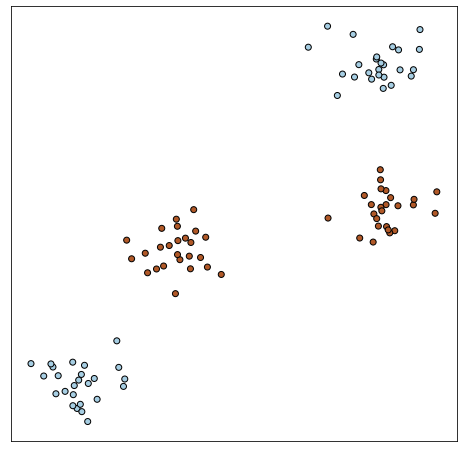

In [38]:
data2 = Data(make_blobs, centers=4, random_state=8)
data2.Y = data2.Y % 2

plt.figure(figsize=(8, 8))
plt.scatter(data2.x0, data2.x1, c=data2.Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.show()

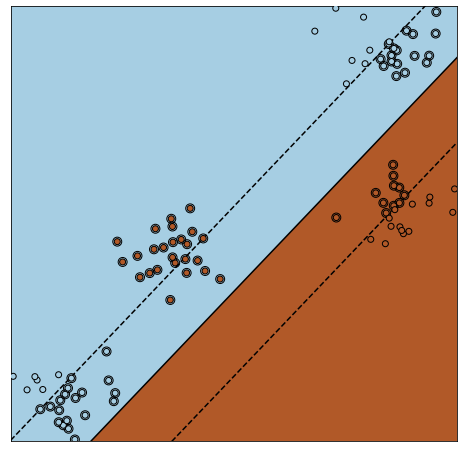

In [39]:
plot_classification(SVC(kernel='linear', C=1.0), data2, hyperplane=True)

## Kernel trick

![](image_files/kernel_trick.png)

- A kernel is a dot product in some feature space:
$$
K(\mathbf{x}_i, \mathbf{x}_j) = \Phi(\mathbf{x}_i)^T\Phi(\mathbf{x}_j)
$$

### Popular kernels
$
\begin{align}
K(\mathbf{x}_i, \mathbf{x}_j) &= \mathbf{x}_i^T\mathbf{x}_j \quad&\text{Linear kernel} \\
K(\mathbf{x}_i, \mathbf{x}_j) &= \text{exp}(-\gamma\|\mathbf{x}_i-\mathbf{x}_j\|^2) \quad&\text{Gaussian (RBF) kernel} \\
K(\mathbf{x}_i, \mathbf{x}_j) &= \text{exp}(-\gamma\|\mathbf{x}_i-\mathbf{x}_j\|) \quad&\text{Exponential kernel} \\
K(\mathbf{x}_i, \mathbf{x}_j) &= \text{exp}(p+\mathbf{x}_i^T\mathbf{x}_j)^q \quad&\text{Polynomial kernel} \\
K(\mathbf{x}_i, \mathbf{x}_j) &= \text{exp}(p+\mathbf{x}_i^T\mathbf{x}_j)^q\text{exp}(-\gamma\|\mathbf{x}_i-\mathbf{x}_j\|^2) \quad&\text{Hybrid kernel} \\
K(\mathbf{x}_i, \mathbf{x}_j) &= \text{tanh}(k\mathbf{x}_i^T\mathbf{x}_j-\delta) \quad&\text{Sigmoidal}
\end{align}
$


### Polynomial kernel

- $K(\mathbf{x}_i, \mathbf{x}_j) = \text{exp}(p+\mathbf{x}_i^T\mathbf{x}_j)^q$

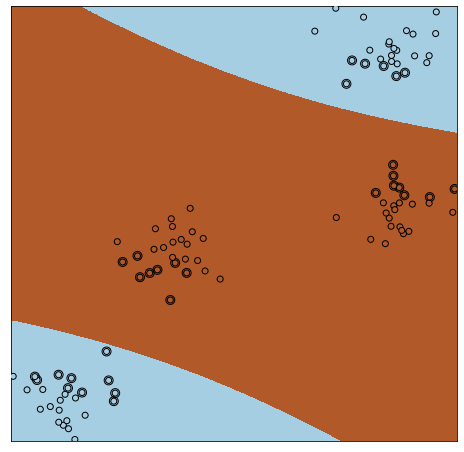

In [40]:
''' q = 2 '''

plot_classification(SVC(kernel='poly', degree=2, C=0.1), data2)

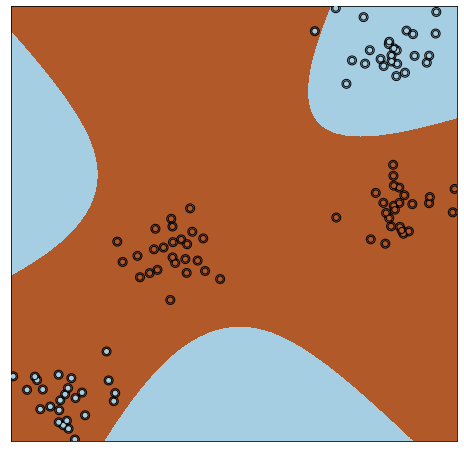

In [41]:
''' q = 3 '''

plot_classification(SVC(kernel='poly', degree=3, C=0.1), data2)

### Gaussian kernel

- $K(\mathbf{x}_i, \mathbf{x}_j) = \text{exp}(-\gamma\|\mathbf{x}_i-\mathbf{x}_j\|^2)$

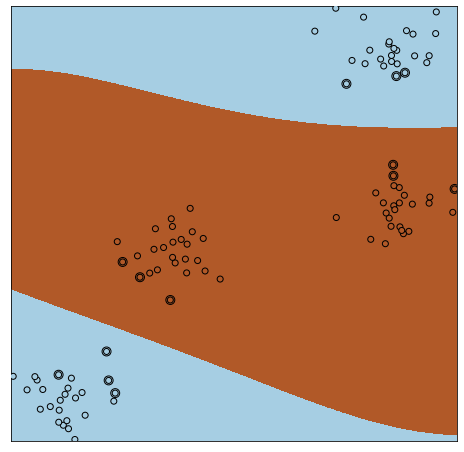

In [42]:
plot_classification(SVC(kernel='rbf', C=1.0), data2)

## Loss and penalty

- Many statistical learning algorithms (including SVMs) search for a decision function by solving the following optimization problem:

$$
\text{minimize}(\color{blue}{\text{Loss}} + \color{green}{\lambda} \ \color{red}{\text{Penalty}})
$$
- $\color{blue}{\text{Loss}}$ measures error of fitting the data
- $\color{red}{\text{Penalty}}$ penalizes complexity of the learned function
- $\color{green}{\lambda}$ is regularization parameter that balances $\color{blue}{\text{Loss}}$ and $\color{red}{\text{Penalty}}$

### Flexibility of "loss + penalty" framework

⠀⠀⠀⠀⠀⠀Loss function⠀⠀⠀⠀⠀⠀|⠀⠀⠀⠀⠀⠀Penalty function|⠀⠀⠀⠀⠀⠀Resulting algorithm
-|-|-
Mean squared error: $\sum_{i=1}^N(y_i-f(\mathbf{x}_i))^2$ | $\lambda\|\mathbf{w}\|_2^2$ | Ridge regression
Mean squared error: $\sum_{i=1}^N(y_i-f(\mathbf{x}_i))^2$ | $\lambda\|\mathbf{w}\|_1$ | Lasso
Mean squared error: $\sum_{i=1}^N(y_i-f(\mathbf{x}_i))^2$ | $\lambda_1\|\mathbf{w}\|_1+\lambda_2\|\mathbf{w}\|_2^2$ | Elastic net
Hinge loss: $\sum_{i=1}^N[1-y_if(\mathbf{x}_i)]_+$ | $\lambda\|\mathbf{w}\|_2^2$ | SVMs
Hinge loss: $\sum_{i=1}^N[1-y_if(\mathbf{x}_i)]_+$ | $\lambda\|\mathbf{w}\|_1$ | 1-norm SVMs

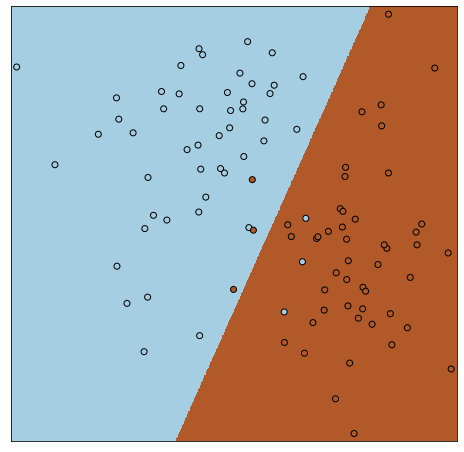

In [52]:
''' l1 SVM '''

from sklearn.svm import LinearSVC

plot_classification(LinearSVC(penalty='l1', dual=False, C=1.0), data1)

## SVM for multicategory data

![](figures/multiclass.png)

- Just solving single classification problems for all combinatorial cases



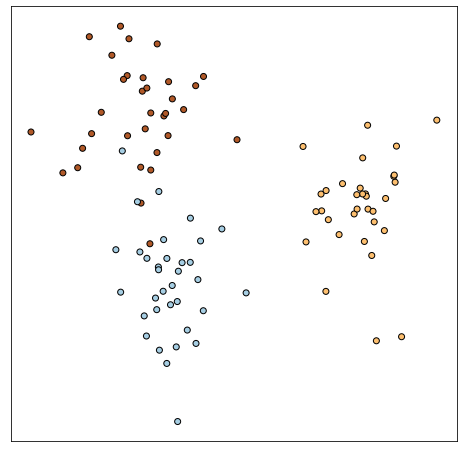

In [44]:
data3 = Data(make_blobs, centers=3, random_state=27)

plt.figure(figsize=(8, 8))
plt.scatter(data3.x0, data3.x1, c=data3.Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.show()


### One-versus-rest (OVR) and One-versus-one (OVO) 

![](figures/multiclass2.png)


- OVR : have to solve the problems $n$ times
- OVO : have to solve the problems $n \choose 2$ times

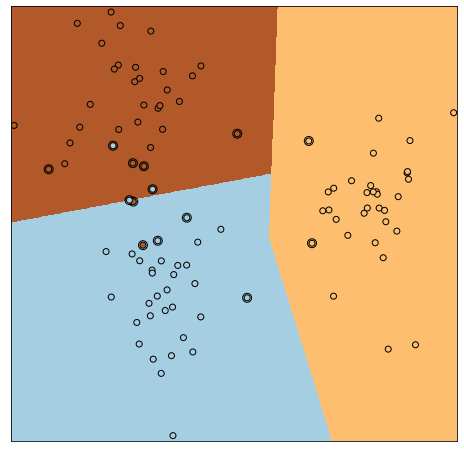

Support vector(s):
 [[-2.32880062  7.81842796]
 [-2.80439142  8.77717587]
 [-1.65616459  8.01080892]
 [-1.50619435  7.10335641]
 [ 1.08629599  6.09829478]
 [-0.66451524  7.50872847]
 [ 2.87448706  8.86116311]
 [ 2.96823989  7.05983228]
 [-1.91001984  8.41649384]
 [-2.21628581  7.79287418]
 [-4.67160748  8.36324917]
 [-1.93650695  7.02521704]
 [ 0.79992524  8.98876347]
 [-2.22710497  8.47017484]] 
 b:
 [ 4.54124787  9.9678967  -1.23727294]


In [45]:
model1 = SVC(kernel='linear', C=1.0)
plot_classification(model1, data3)
print('Support vector(s):\n', model1.support_vectors_,'\n', 'b:\n', model1.intercept_)

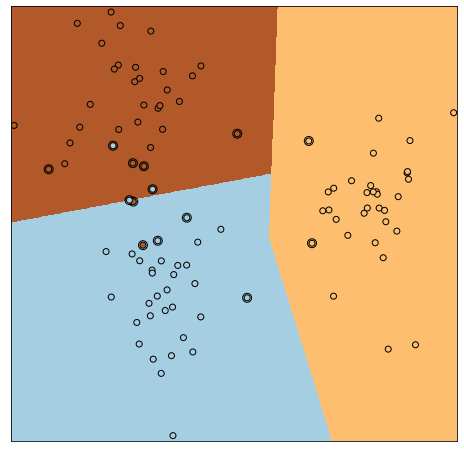

Support vector(s):
 [[-2.32880062  7.81842796]
 [-2.80439142  8.77717587]
 [-1.65616459  8.01080892]
 [-1.50619435  7.10335641]
 [ 1.08629599  6.09829478]
 [-0.66451524  7.50872847]
 [ 2.87448706  8.86116311]
 [ 2.96823989  7.05983228]
 [-1.91001984  8.41649384]
 [-2.21628581  7.79287418]
 [-4.67160748  8.36324917]
 [-1.93650695  7.02521704]
 [ 0.79992524  8.98876347]
 [-2.22710497  8.47017484]] 
 b:
 [ 4.54124787  9.9678967  -1.23727294]


In [46]:
model2 = SVC(kernel='linear', C=1.0, decision_function_shape = 'ovo')
plot_classification(model2, data3)
print('Support vector(s):\n', model2.support_vectors_,'\n', 'b:\n', model2.intercept_)

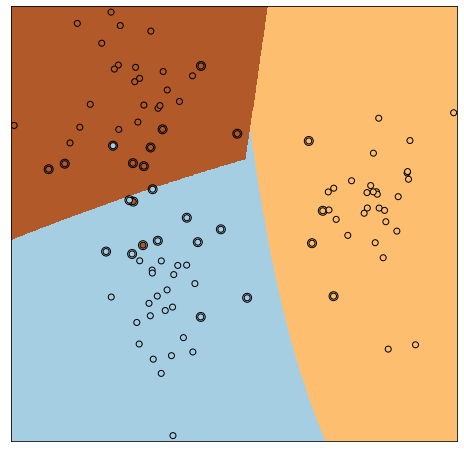

In [47]:
plot_classification(SVC(kernel='poly', C=1.0, degree=2), data3)

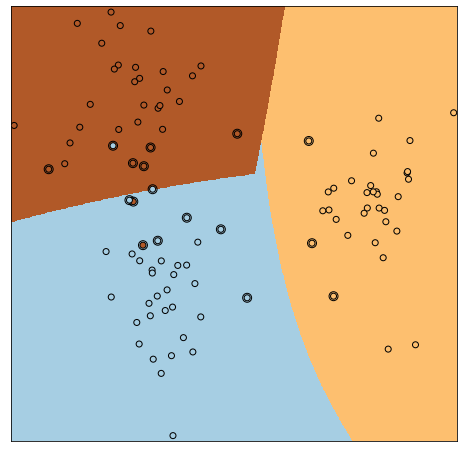

In [48]:
plot_classification(SVC(kernel='poly', C=1.0, degree=3), data3)

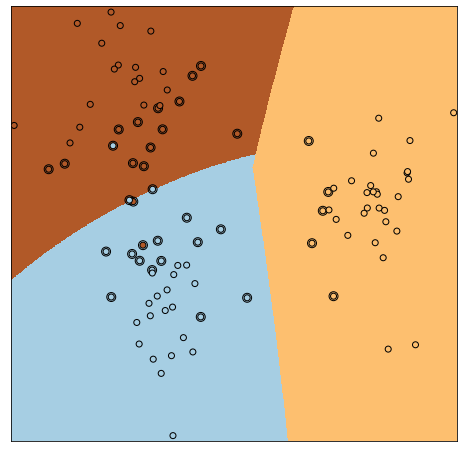

In [49]:
plot_classification(SVC(kernel='rbf', C=1.0), data3)

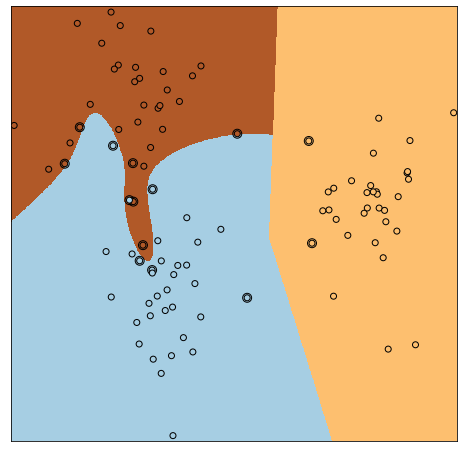

In [50]:
plot_classification(SVC(kernel='rbf', C=1e6, max_iter=1e6), data3)